In [3]:
import os
import configparser

import geopandas as gpd
from shapely.geometry import Point, Polygon

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
config_file =  os.path.join(root, "config.cfg")

# geodata for shapefiles
config = configparser.ConfigParser()
config.read(config_file)
gdata_root = config["geodata"]["path"]

# Get data

## London grid

Check [this notebook](https://github.com/Lisa-Ho/30-day-map-challenge/blob/main/2022/Day12/london-gridmaps.ipynb) for how to generate fishnet grids from any shapefile.

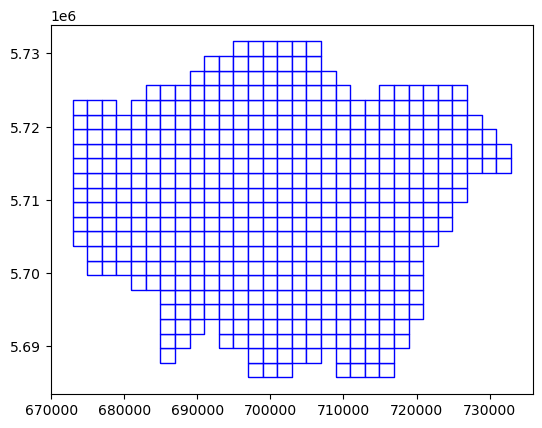

In [5]:
grid2km = gpd.GeoDataFrame.from_file(os.path.join(gdata_root, "fishnets\\london-2000-2000.geojson"))
grid2km.plot(color="white", edgecolor="blue")

## Trees

In [6]:
#load trees
df = pd.read_csv("Borough_tree_list_2021July.csv")

#prepare dataset
geometry = [Point(xy) for xy in zip(df['longitude'].astype(float), df['latitude'].astype(float))]
gdf = gpd.GeoDataFrame(df, crs = 'EPSG:4326', geometry = geometry)
gdf.head()

C:\Users\lisa.hornung\AppData\Local\Temp\ipykernel_19848\732635815.py:2: DtypeWarning: Columns (7,8,9,11,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Borough_tree_list_2021July.csv")


,objectid,borough,maintainer,gla_tree_name,tree_name,taxon_name,common_name,age,age_group,height_m,spread_m,canopy_spread_group,diameter_at_breast_height_cm,dbh_group,longitude,latitude,condition,load_date,updated,geometry
0,1,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Early mature (16-30),10 to 15m,NaN,00 to 05m,NaN,21 to 40cm,-0.291147,51.361893,Reasonable,20210318,20210715,POINT (-0.29115 51.36189)
1,2,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Early mature (16-30),10 to 15m,NaN,00 to 05m,NaN,21 to 40cm,-0.291122,51.361914,Reasonable,20210318,20210715,POINT (-0.29112 51.36191)
2,3,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Early mature (16-30),05 to 10m,NaN,05 to 10m,NaN,21 to 40cm,-0.290943,51.387016,Reasonable,20210318,20210715,POINT (-0.29094 51.38702)
3,4,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Mature (31-80),10 to 15m,NaN,05 to 10m,NaN,41 to 70cm,-0.288572,51.387405,Reasonable,20210318,20210715,POINT (-0.28857 51.38740)
4,5,Kingston upon Thames,Royal Borough of Kingston upon Thames,Other,NaN,Abies grandis,Grand fir,NaN,Mature (31-80),10 to 15m,NaN,05 to 10m,NaN,41 to 70cm,-0.285025,51.388872,Reasonable,20210318,20210715,POINT (-0.28502 51.38887)


# Explore

In [60]:
pivot = gdf.groupby(["gla_tree_name", "borough" ])["objectid"].count().unstack()
pivot = pivot.transpose()
pivot["Majority"] = pivot.idxmax(axis=1)
pivot

gla_tree_name,Alder,Apple,Ash,Beech,Birch,Black locust,Blackthorn,Cherry,Chestnut,Cypress,...,Other,Pear,Pine,Plane,Poplar,Rowan,Sycamore,Whitebeam,Willow,Majority
borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,219.0,695.0,865.0,178.0,570.0,353.0,7.0,3258.0,188.0,211.0,...,1301.0,478.0,77.0,1536.0,1101.0,133.0,89.0,1185.0,206.0,Cherry
Barnet,404.0,1579.0,1963.0,234.0,3102.0,163.0,5.0,9545.0,380.0,393.0,...,5756.0,485.0,260.0,2642.0,216.0,429.0,491.0,1867.0,398.0,Cherry
Bexley,29.0,719.0,355.0,42.0,974.0,137.0,NaN,3147.0,24.0,5.0,...,678.0,322.0,71.0,323.0,5.0,61.0,23.0,1172.0,22.0,Cherry
Brent,1.0,NaN,28.0,1.0,11.0,2.0,NaN,21.0,NaN,NaN,...,22.0,NaN,NaN,20.0,5.0,19.0,8.0,6.0,NaN,Lime
Bromley,1029.0,2047.0,4495.0,1228.0,2324.0,585.0,NaN,10970.0,538.0,1705.0,...,8011.0,910.0,1095.0,1191.0,1235.0,6.0,35.0,3302.0,752.0,Maple
Camden,321.0,720.0,1342.0,144.0,1325.0,535.0,1.0,2714.0,47.0,261.0,...,2959.0,352.0,45.0,3761.0,145.0,156.0,238.0,1361.0,170.0,Plane
City,50.0,18.0,40.0,27.0,139.0,32.0,NaN,129.0,NaN,19.0,...,360.0,28.0,1.0,210.0,NaN,15.0,7.0,12.0,16.0,Other
Croydon,37.0,8.0,32.0,8.0,36.0,8.0,NaN,38.0,3.0,3.0,...,78.0,24.0,14.0,197.0,6.0,21.0,29.0,40.0,NaN,Lime
Ealing,521.0,1958.0,2760.0,139.0,1809.0,277.0,NaN,6254.0,45.0,1240.0,...,3382.0,1116.0,162.0,1940.0,625.0,4.0,33.0,2348.0,283.0,Cherry


## Combine data

In [7]:
#merge grid cell index to tree dat
grid = grid2km.copy()
gdf = gdf.to_crs(grid.crs)
merged = gpd.sjoin(gdf, grid, how='left')

In [8]:
# count tree types by grid cell and get the most frequent type
tree_type = merged.groupby(["index_right", "gla_tree_name"])["objectid"].count().to_frame().unstack()
tree_type.columns = tree_type.columns.droplevel(level=0)
tree_type["Majority_tree"] = tree_type.idxmax(axis=1)
for i in range(len(tree_type)):
    tree_type.loc[tree_type.index[i], "Majority_tree_number"] = tree_type.iloc[i][tree_type.iloc[i]["Majority_tree"]]
tree_type["Tree_total"] =  tree_type[tree_type.columns[:-2]].sum(axis=1)
tree_type["Majority_tree_perc"] = tree_type["Majority_tree_number"] / tree_type["Tree_total"] *100

In [9]:
# include tree counts and type in grid
grid.loc[tree_type.index, "total_trees"] = tree_type["Tree_total"].values
grid.loc[tree_type.index, "majority_tree"] = tree_type["Majority_tree"].values
grid.loc[tree_type.index, "majority_tree_perc"] = tree_type["Majority_tree_perc"].values

# Visualisation

In [10]:
#create new column to combine tree type
type_map = {'Whitebeam':"Other", 'Cherry':'Cherry', 'Elm':"Other", 'Maple':"Maple", 'Lime':"Lime", 'Oak':"Oak", 'Birch':"Other",
       'Ash':"Other", 'Other':"Other", 'Hawthorn':"Other", 'Plane':"Plane", 'Poplar':"Other", 'Pear':"Other", 'Chestnut':"Other",
       'Cypress':"Other", 'Horse chestnut':"Other", 'Hornbeam':"Other" }
grid["majority_tree_collapsed"] = grid["majority_tree"].map(type_map)

# map symbols against tree types
symbol_map = {'Other':"", 'Cherry': "o", 'Maple':"^", 'Lime':"s", 'Oak':"h", 'Plane':"D" }
grid["majority_tree_symbol"] = grid["majority_tree_collapsed"].map(symbol_map)
grid["majority_tree_symbol"] = grid["majority_tree_symbol"].fillna("")

In [11]:
grid_centroid = grid.copy()
grid_centroid["geometry"] = grid_centroid["geometry"].centroid

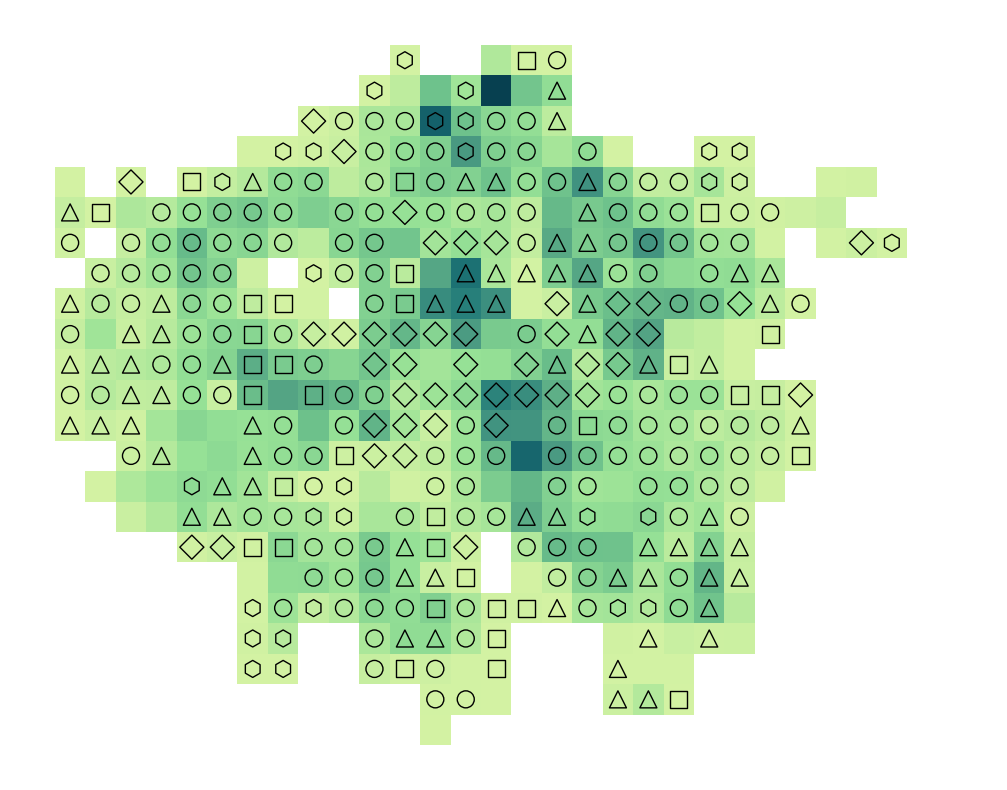

In [42]:
#configuration, colors and fonts
from palettable.cartocolors.sequential import BluGrn_7, Emrld_7, agGrnYl_7_r
cmap = Emrld_7.mpl_colormap
#bg_color = "#EFEFEF"
bg_color = "white"

#plot
fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor(bg_color)

# ===
# Data
values = "total_trees"
grid.plot(ax=ax, column=values, alpha=1, zorder=3, cmap=cmap)
for i in range(len(grid_centroid)):
    ax.scatter(grid_centroid["geometry"].x.iloc[i], grid_centroid["geometry"].y.iloc[i],
               s=150, marker=grid_centroid["majority_tree_symbol"].iloc[i] , edgecolor="black", linewidth=1, facecolors="None", zorder=4)
               # s=200, marker=svg_marker , color="black", zorder=4, alpha=0.5)
#grid.plot(ax=ax, color="#CDCDCD",zorder=2)


ax.axis("off")

plt.show()

## Custom markers

In [12]:
import matplotlib as mpl
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

In [22]:
svg_path, attributes = svg2paths('plane.svg')
svg_marker = parse_path(attributes[0]['d'])

svg_marker.vertices -= svg_marker.vertices.mean(axis=0)
svg_marker = svg_marker.transformed(mpl.transforms.Affine2D().rotate_deg(180))
svg_marker = svg_marker.transformed(mpl.transforms.Affine2D().scale(-1,1))

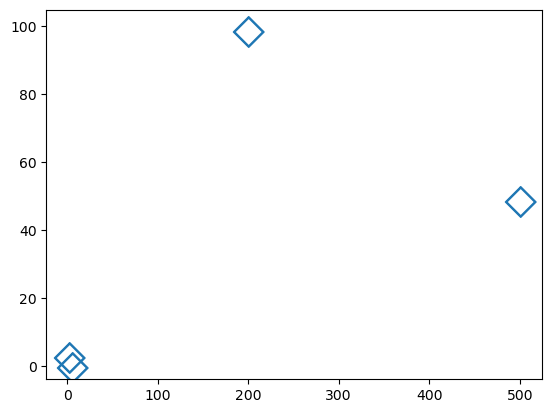

In [23]:
plt.plot([2,5, 500, 200],[4,1, 50, 100], 'o',marker=svg_marker,markersize=30)

## Grid

Check [this notebook](https://github.com/Lisa-Ho/30-day-map-challenge/blob/main/2022/Day12/london-gridmaps.ipynb) for how to generate fishnet grids from any shapefile.